In [61]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
#levs=np.concatenate((np.linspace(0,0.01,20),np.linspace(0.011,1,1)))


def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)


MHH_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/zi_touze.xy.nc',decode_times=False)
MHH_2d_stacked=MHH_2d.stack(xy=('x','y'))
#MHH_2d_stacked=MHH_2d_stacked.where(MHH_2d_stacked['zi_touze']<1200,np.nan)
SAM_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb2/EUREC4A_2Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_2D_1024_HOURLY_CONCAT.nc',decode_times=True)
SAM_2d_stacked=SAM_2d[['MLD']].stack(xy=('x','y'))
SAM_NOAA_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001.hera.2023-12-23-01h08m58s/OUT_2D/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt_2D_0300s.nc',decode_times=True)
SAM_NOAA_2d_stacked=SAM_NOAA_2d[['HMIX']].stack(xy=('x','y'))
DALES_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_Results/Feb2_1024x1024_150m/fieldint.lwp.001.nc',decode_times=False)
MONC_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200202_diagnostic_mlh.nc',decode_times=False)
MONC_2d_stacked=MONC_2d[['mlh_level']].stack(xy=('x','y'))
#MONC_2d_stacked=MONC_2d.stack(xy=('x','y'))
#MHH_2d['ql_path'] = MHH_2d['ql_path'].where(MHH_2d['ql_path']>1e-3,np.nan)
#SAM_2d['LWP']=SAM_2d['LWP'].where(SAM_2d['LWP']>1e-3,np.nan)
#SAM_NOAA_2d['CWP']=SAM_NOAA_2d['CWP'].where(SAM_NOAA_2d['CWP']>1e-3,np.nan)
#DALES_2d['lwp']=DALES_2d['lwp'].where(DALES_2d['lwp']>1e-3,np.nan)


#pl.figure(figsize=(7, 7))
#SAM_NOAA_2d['HMIX'].isel(time=int(65*3600/1800)).transpose().plot.contourf()



In [62]:
MHH_2d_stacked['time']=MHH_2d_stacked['time']/3600
df=MHH_2d_stacked.isel(time=slice(40*12,79*12,24)).to_dataframe()
df['time']=df.index.get_level_values('time')
df['time']=df['time'].astype('int64')

SAM_2d_stacked['time']=(SAM_2d_stacked['time']-SAM_2d_stacked['time'][0])*24
df1=SAM_2d_stacked.isel(time=slice(40,79,2)).to_dataframe()
df1['time']=df1.index.get_level_values('time')
df1['time']=df1['time'].astype('int64')

SAM_NOAA_2d_stacked['time']=(SAM_NOAA_2d_stacked['time']-SAM_NOAA_2d_stacked['time'][0])*24
df2=SAM_NOAA_2d_stacked.isel(time=slice(40*12,79*12,24)).to_dataframe()
df2['time']=df2.index.get_level_values('time')
df2['time']=df2['time'].astype('int64')

MONC_2d_stacked['time']=MONC_2d_stacked['time']/3600
df3=MONC_2d_stacked.isel(time=slice(40,79,2)).to_dataframe()
df3['time']=df3.index.get_level_values('time')
df3['time']=df3['time'].astype('int64')



In [76]:
(SAM_NOAA_2d_stacked['HMIX'].isel(time=48*12).size)**0.5

1024.0

/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning

[(0.0, 2000.0)]

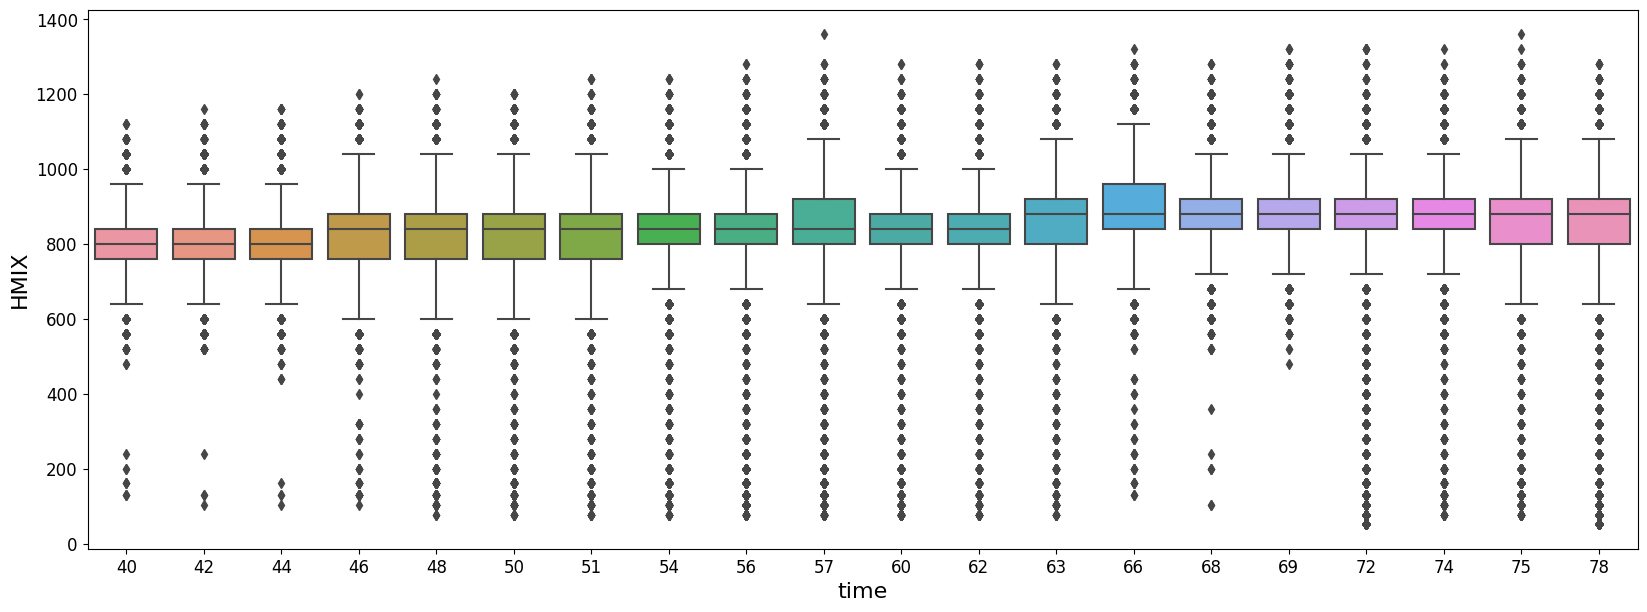

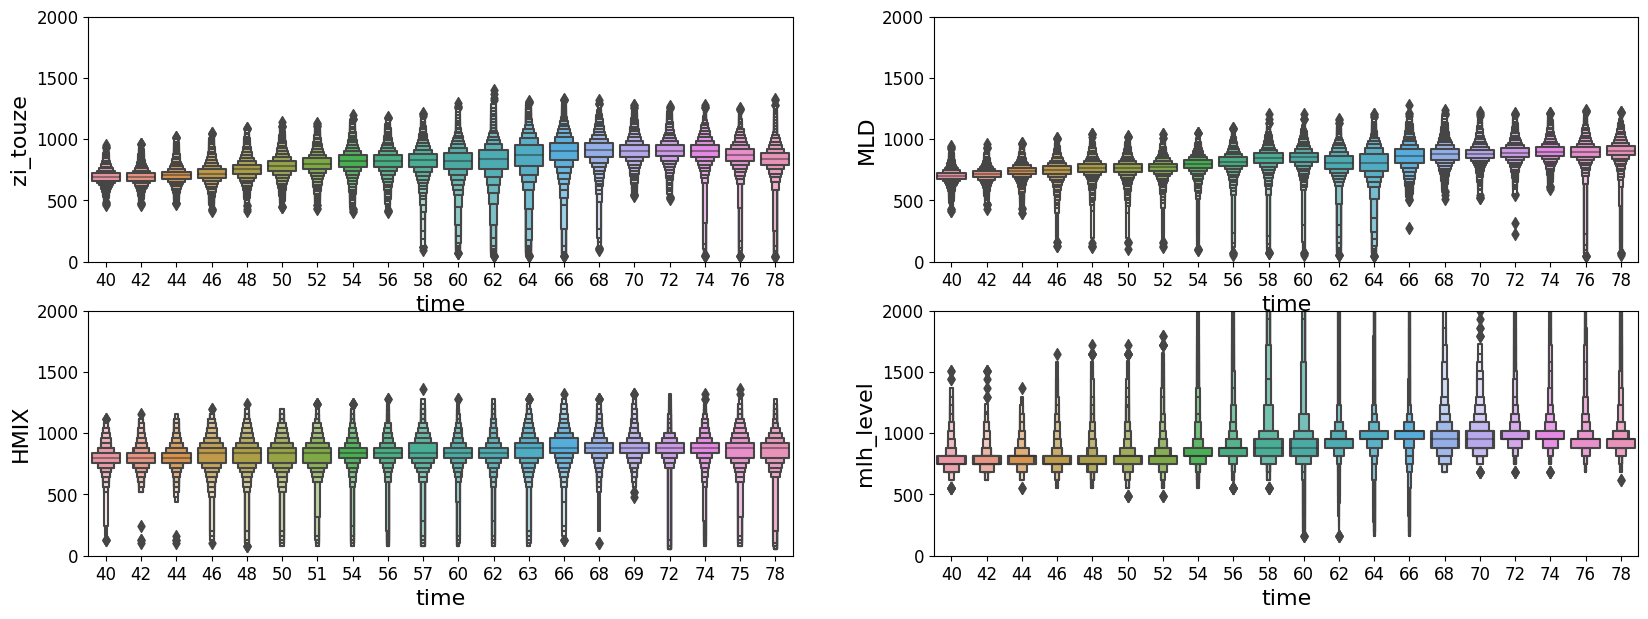

In [78]:
import seaborn as sns

pl.figure(figsize=(20, 7))
g=sns.boxplot(data=df2,y='HMIX',x='time')

pl.subplots(2,2,figsize=(20, 7))

pl.subplot(2,2,1)
g=sns.boxenplot(data=df,y='zi_touze',x='time',scale='area')
g.set(ylim=(0,2000))

pl.subplot(2,2,2)
g=sns.boxenplot(data=df1,y='MLD',x='time',scale='area')
g.set(ylim=(0,2000))


pl.subplot(2,2,3)
g=sns.boxenplot(data=df2,y='HMIX',x='time',scale='area')
g.set(ylim=(0,2000))

pl.subplot(2,2,4)
g=sns.boxenplot(data=df3,y='mlh_level',x='time',scale='area')
g.set(ylim=(0,2000))

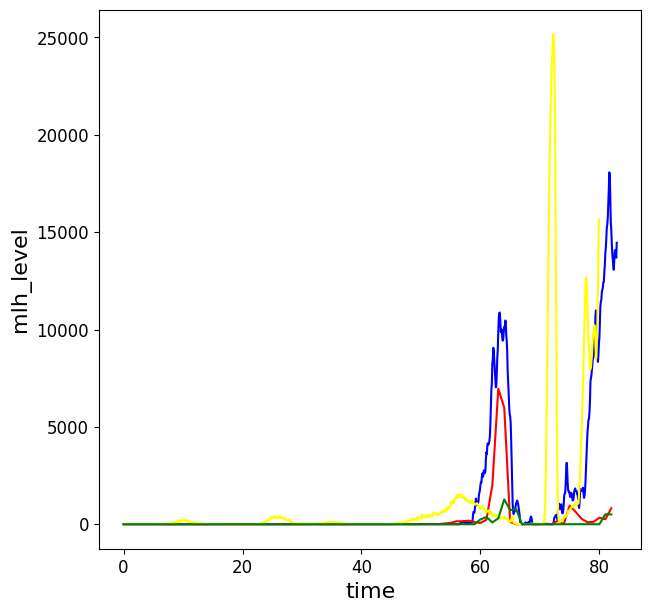

In [46]:
pl.figure(figsize=(7, 7))
(MHH_2d_stacked['zi_touze']<300).sum(dim='xy').plot.line(x='time',label='MHH',color='blue')
(SAM_2d_stacked['MLD']<300).sum(dim='xy').plot.line(x='time',label='SAM',color='red')
(SAM_NOAA_2d_stacked['HMIX']<300).sum(dim='xy').plot.line(x='time',label='SAM_NOAA',color='yellow')
(MONC_2d_stacked['mlh_level']<300).sum(dim='xy').plot.line(x='time',label='MONC',color='green')

0.026107734


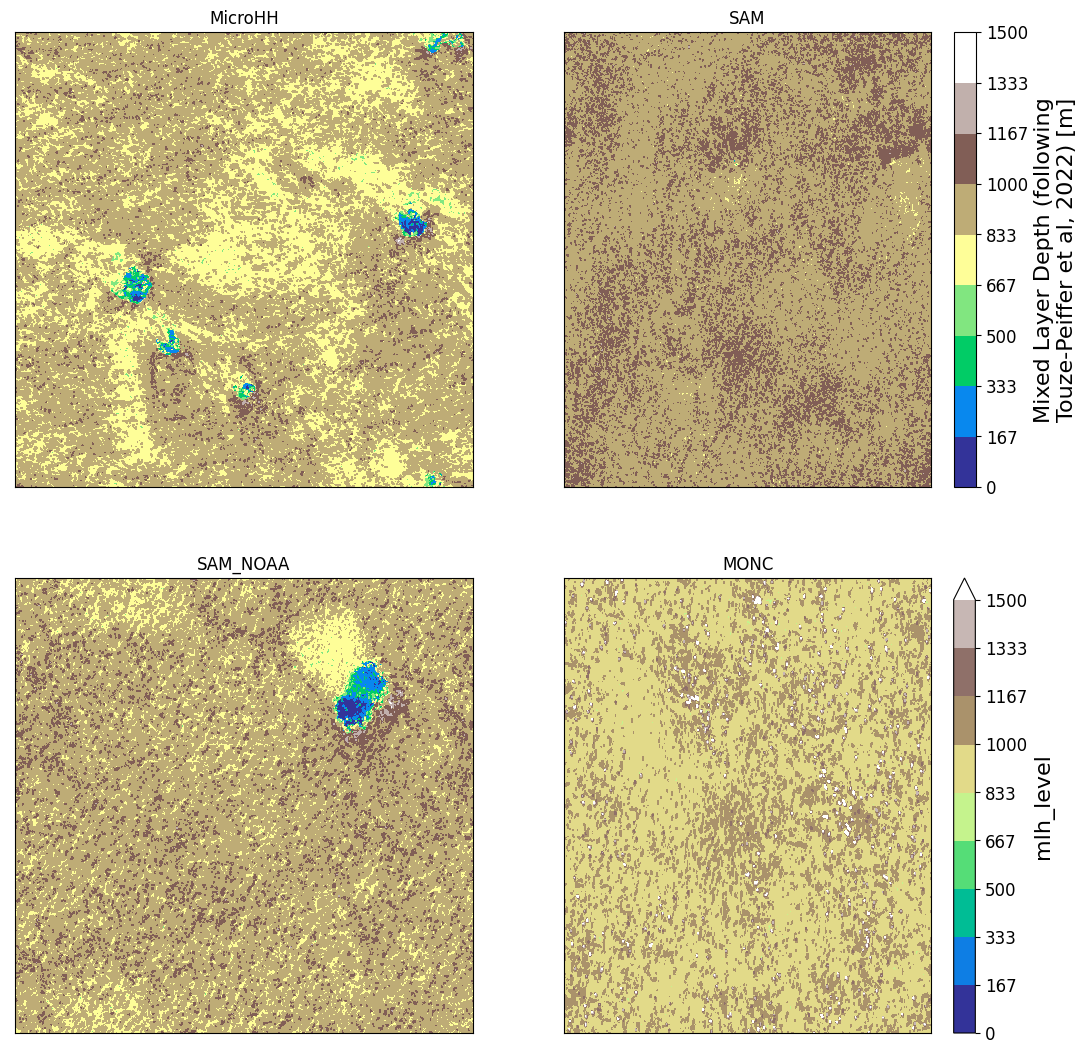

In [77]:
hr_plot=79
levs=powspace(0.01,2.5,2,20)
levs=np.linspace(0,1500,10)



fig, axs = pl.subplots(2, 2, figsize=(13, 13))
pl.subplot(221)

MHH_2d['zi_touze'].isel(time=int(hr_plot*3600/300)).plot.contourf(levels=levs,cmap='terrain',add_colorbar=False)
pl.title('MicroHH')
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.subplot(222)

SAM_2d['MLD'].isel(time=int(hr_plot*3600/3600)).transpose().plot.contourf(levels=levs,cmap='terrain')
pl.xlabel('')
pl.ylabel('')
pl.title('SAM')
pl.yticks([])
pl.xticks([])
pl.subplot(223)
SAM_NOAA_2d['HMIX'].isel(time=int((hr_plot)*3600/300)).plot.contourf(levels=levs,cmap='terrain',add_colorbar=False)
pl.xlabel('')
pl.ylabel('')
pl.title('SAM_NOAA')
pl.yticks([])
pl.xticks([])
pl.subplot(224)
MONC_2d['mlh_level'].isel(time=int(hr_plot*3600/3600)).plot.contourf(levels=levs,cmap='terrain')
pl.xlabel('')
pl.ylabel('')
pl.title('MONC')
pl.yticks([])
pl.xticks([])
print(DALES_2d['lwp'].isel(time=int(hr_plot*3600/900)).mean(dim=['xt','yt']).values)



In [1]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np


pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
#levs=np.concatenate((np.linspace(0,0.01,20),np.linspace(0.011,1,1)))


def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)


MHH_qlpath=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_path.xy.nc',decode_times=False)
MHH_qlbase=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_base.xy.nc',decode_times=False)
MHH_qltop=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_top.xy.nc',decode_times=False)
MHH_qrpath=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/qr_path.xy.nc',decode_times=False)
MHH_rrbot=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/rr_bot.xy.nc',decode_times=False)
MHH_qlbase['ql_top'] = MHH_qlbase['ql_base'].copy()
MHH_qlbase['ql_top'].values=MHH_qltop['ql_top'].values

MHH_qlbase_stacked=MHH_qlbase.stack(xy=('x','y'))
MHH_qlbase_stacked=MHH_qlbase_stacked.where(MHH_qlbase_stacked['ql_base']>0,np.nan)


hr_plot=64
levs=powspace(0.01,2.5,2,20)


Text(0.5, 1.0, 'Surface Precipitation Rate')

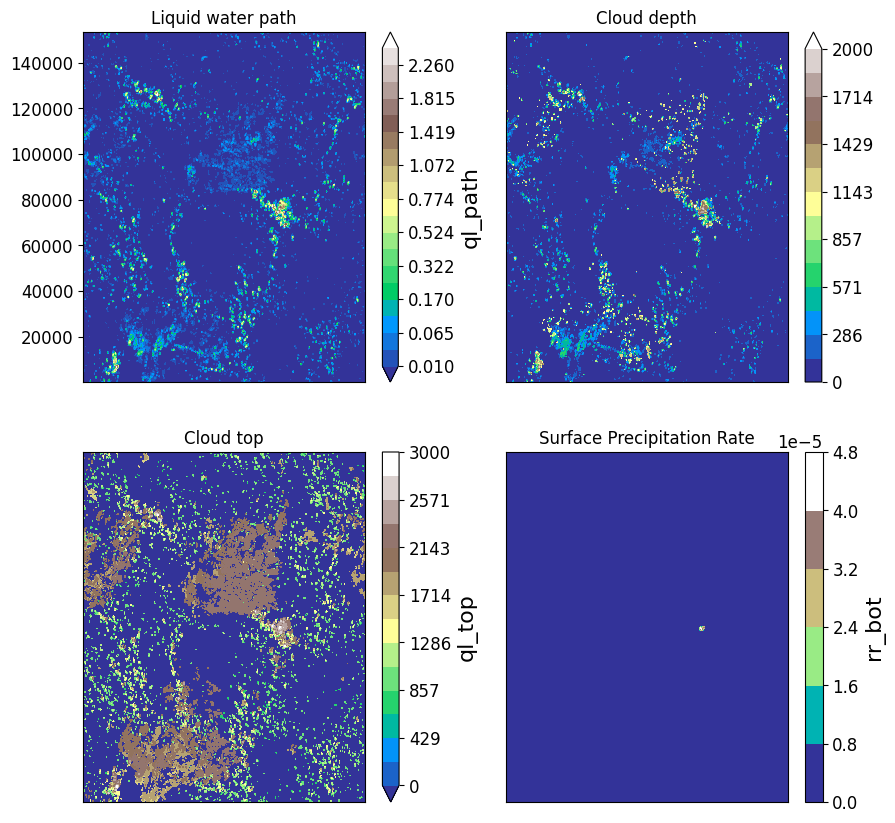

In [3]:
hr_plot=67
fig, axs = pl.subplots(2, 2, figsize=(10, 10))
pl.subplot(221)

MHH_qlpath['ql_path'].isel(time=int(hr_plot*3600/300)).plot.contourf(levels=levs,cmap='terrain',add_colorbar=True)
pl.xticks([])

pl.xlabel('')
pl.ylabel('')
pl.title('Liquid water path')

pl.subplot(222)
(MHH_qltop['ql_top']-MHH_qlbase['ql_base']).isel(time=int(hr_plot*3600/300)).plot.contourf(levels=np.linspace(0,2000,15),cmap='terrain',add_colorbar=True)
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.title('Cloud depth')

pl.subplot(223)
(MHH_qltop['ql_top']).isel(time=int(hr_plot*3600/300)).plot.contourf(levels=np.linspace(0,3000,15),cmap='terrain',add_colorbar=True)
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.title('Cloud top')

pl.subplot(224)
(MHH_rrbot['rr_bot']).isel(time=int(hr_plot*3600/300)).plot.contourf(cmap='terrain',add_colorbar=True)
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.title('Surface Precipitation Rate')

(0.0, 3500.0)

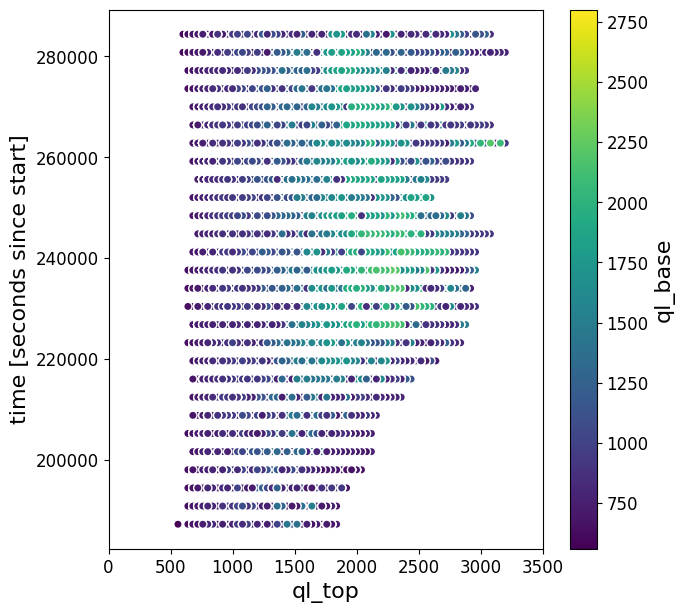

In [53]:
pl.figure(figsize=(7, 7))
MHH_qlbase['ql_top']=MHH_qltop['ql_top']

hr_plot=52
MHH_qlbase=MHH_qlbase.where(MHH_qlbase['ql_base']>1e-3,np.nan)
MHH_qlbase.isel(time=slice(int(hr_plot*3600/300),int((hr_plot+28)*3600/300),12)).plot.scatter(x='ql_top',y='time',hue='ql_base')
pl.xlim(0,3500)



In [11]:
import seaborn as sns
hr_plot=50
df=MHH_qlbase_stacked.isel(time=slice(hr_plot*12,(hr_plot+20)*12,24)).to_dataframe()

/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seab

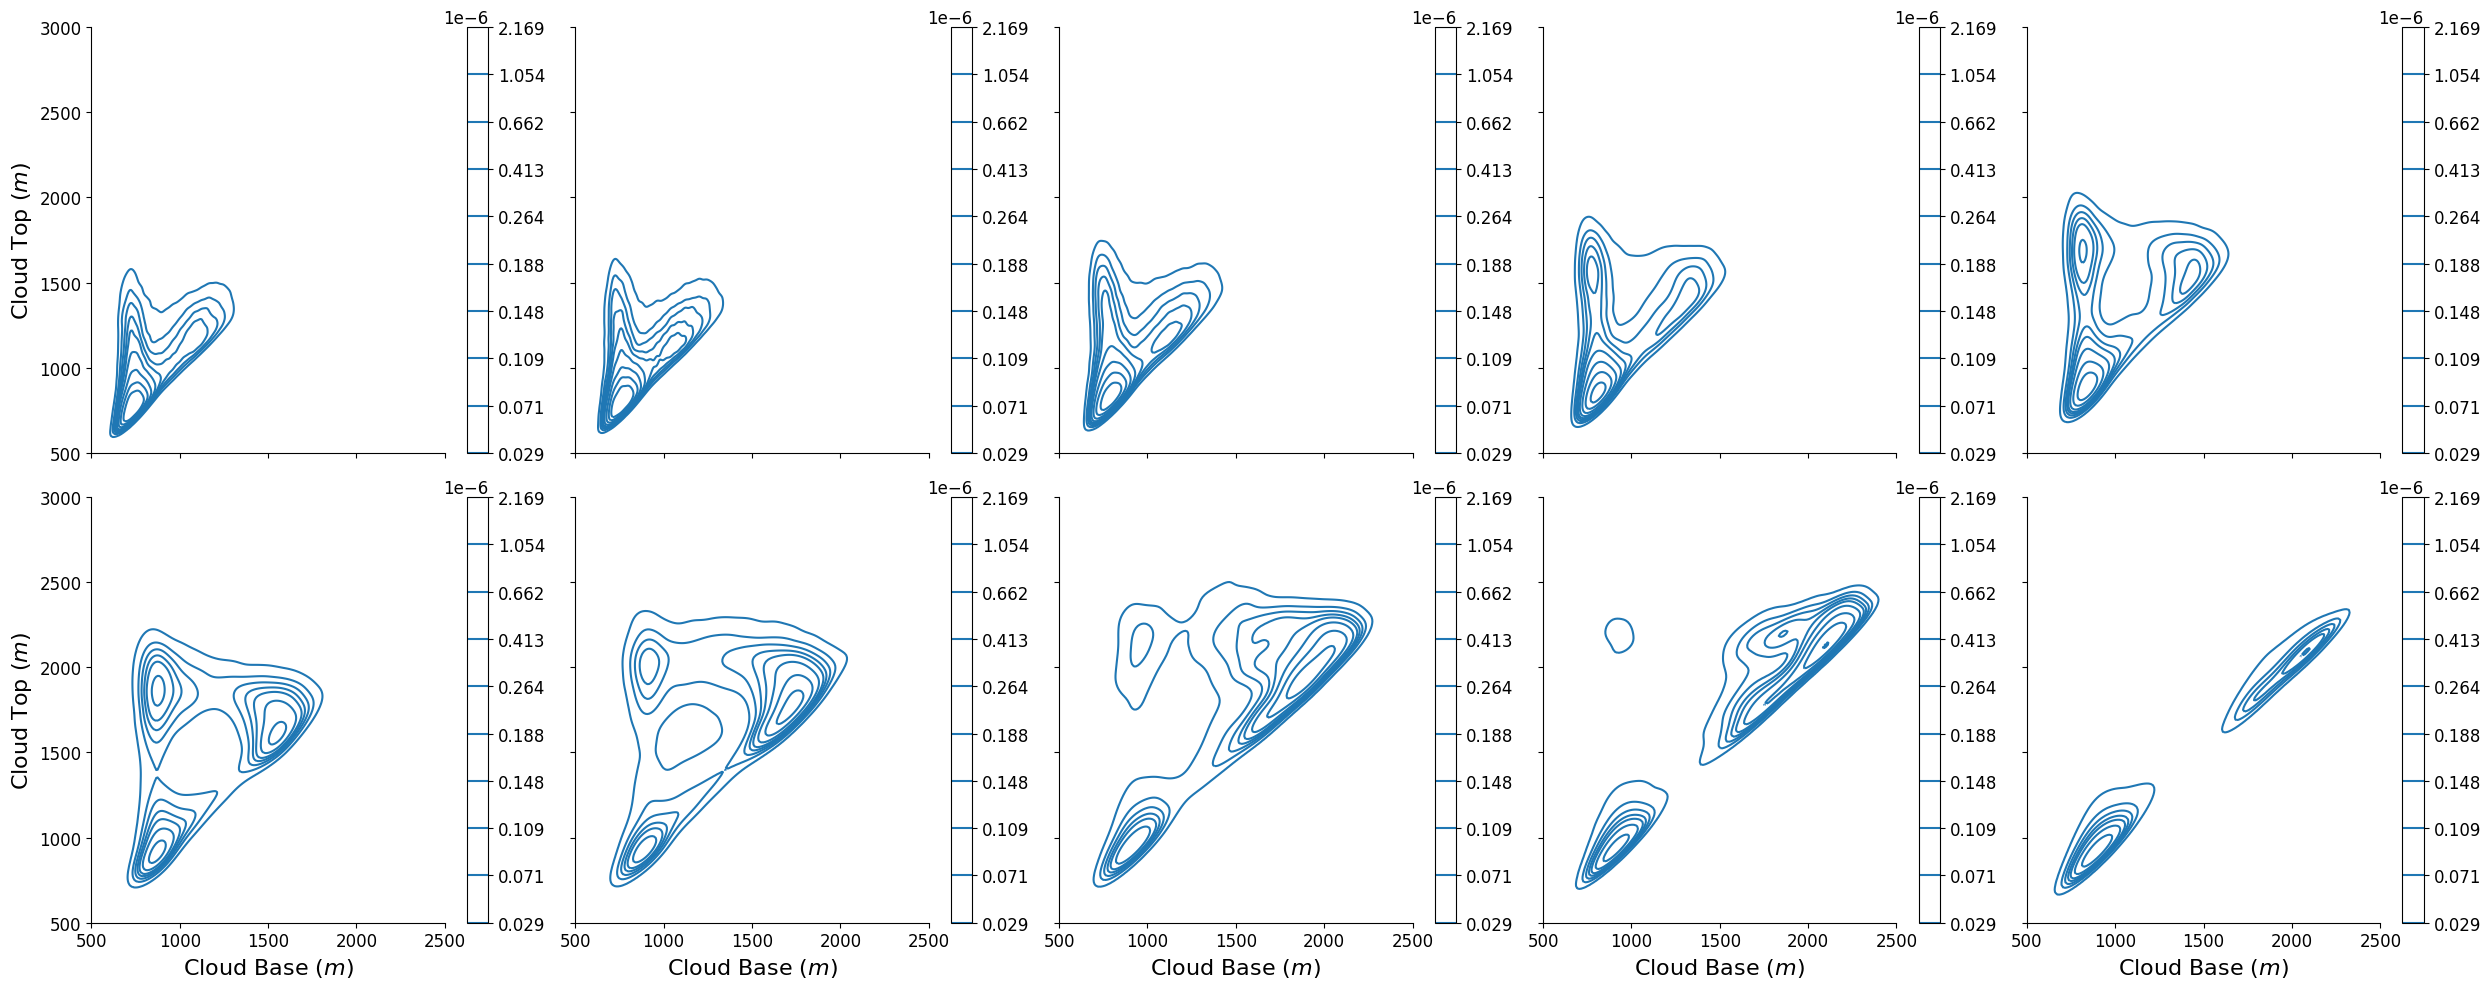

In [12]:
import seaborn as sns

#qlbase=np.ndarray.flatten(MHH_qlbase['ql_base'].where(MHH_qlbase['ql_base']>0).isel(time=int(hr_plot*3600/300)).values)
#qltop=np.ndarray.flatten(MHH_qltop['ql_top'].where(MHH_qlbase['ql_base']>0).isel(time=int(hr_plot*3600/300)).values)
g=sns.displot(df,x="ql_base",y="ql_top",kind='kde',cbar=True,col='time',col_wrap=5)
pl.xlim(500,2500)
pl.ylim(500,3000)
g.set_axis_labels('Cloud Base $(m)$', 'Cloud Top $(m)$')
g.set_titles('')
pl.tight_layout()
pl.show()

#fig, axs = pl.subplots(2, 2, figsize=(10, 20))
#g = sns.FacetGrid(MHH_qlbase_stacked.isel(time=slice(int(hr_plot*3600/300),int((hr_plot+28)*3600/300),24)), col="time", col_wrap=4, height=4)
#g.map(sns.displot, "ql_top", "ql_base", kind='kde')
#for i in range(0,4):
    #pl.subplot(221+i)
    #qlbase=np.ndarray.flatten(MHH_qlbase['ql_base'].where(MHH_qlbase['ql_base']>0).isel(time=int(hr_plot*3600/300)).values)
    #qltop=np.ndarray.flatten(MHH_qltop['ql_top'].where(MHH_qlbase['ql_base']>0).isel(time=int(hr_plot*3600/300)).values)
    #sns.displot(x=qlbase,y=qltop,kind='kde',cbar=True,ax=axs[i])
#    sns.displot(x=np.linspace(0,3500,100),y=np.linspace(0,3500,100),kind='kde',cbar=True,ax=axs[int(i/2),i%2])
    #pl.plot(,np.linspace(0,3500,100),'k--')
    #axs[i].set_xlim(500,2500)
    #axs[i].set_ylim(500,3000)
    #if i==0 or i==2 or i==4 or i==6:
    #    axs[i].set_ylabel('Cloud Top $(m)$')
    #if i==6 or i==7:
    #    axs[i].set_xlabel('Cloud Base $(m)$')
#    hr_plot=hr_plot+2
#pl.tight_layout()
#pl.show()

#pl.plot(MHH_qlbase['ql_base'].where(MHH_qlbase['ql_base']>0).isel(time=int(hr_plot*3600/300)).values,MHH_qltop['ql_top'].where(MHH_qlbase['ql_base']>0).isel(time=int(hr_plot*3600/300)).values,'o')


In [ ]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16

MHH_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/thl.xy.nc',decode_times=False)

(MHH_2d['thl']*(101325/1e5)**(287/1005)).isel(time=int(56*3600/300),z=0).plot.contourf(cmap='RdBu_r',levels=12)